In [61]:
using Plots; pyplot()

Plots.PyPlotBackend()

In [62]:
include("voronoi.jl")

getVoronoiDiagram (generic function with 1 method)

# Calculate the Voronoi diagram for random points in a unit box

The diagram is encoded using a doubly-connected edge list (see Computational Geometry by Mark de Berg et al.).

In [82]:
sites = [(rand(), rand()) for i = 1:10];

@time voronoi = getVoronoiDiagram(sites);

  0.000739 seconds (837 allocations: 25.281 KiB)


# Draw the Voronoi diagram and its outer layer

v: 13
e: 22
f: 11
v - e + f = 2


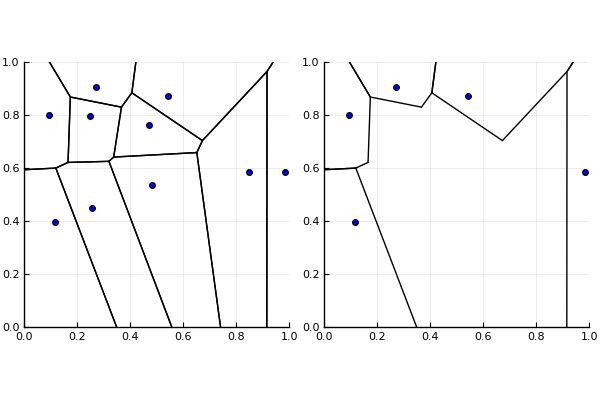

In [83]:
v = length(voronoi.vertices)
e = length(voronoi.halfedges) ÷ 2 # halfedge / 2 gives the actual number of edges
f = length(voronoi.faces) + 1 # +1 counts the external face (assuming a connected planar diagram)

plot()
for face in voronoi.faces
    scatter!(face.site, color="blue")
    
    halfedge = face.outerComponent
    while true
        p0 = halfedge.origin.coordinates
        p1 = halfedge.twin.origin.coordinates

        plot!([p0, p1], color="black")

        halfedge = halfedge.next
        if halfedge === face.outerComponent
            break
        end
    end
end
diagram_plt = plot!(xlims=(0,1), ylims=(0,1), aspect_ratio=:equal, legend=false)

plot()
for face in voronoi.faces
    if face.area < Inf; continue; end
    
    scatter!(face.site, color="blue")
    
    halfedge = face.outerComponent
    while true
        p0 = halfedge.origin.coordinates
        p1 = halfedge.twin.origin.coordinates

        plot!([p0, p1], color="black")

        halfedge = halfedge.next
        if halfedge === face.outerComponent
            break
        end
    end
end
border_plt = plot!(xlims=(0,1), ylims=(0,1), aspect_ratio=:equal, legend=false)

println("v: ", v)
println("e: ", e)
println("f: ", f)
println("v - e + f = ", v - e + f)

plot(diagram_plt, border_plt, layout = 2)

# Getting information about a given face

area: 0.048332314833472154

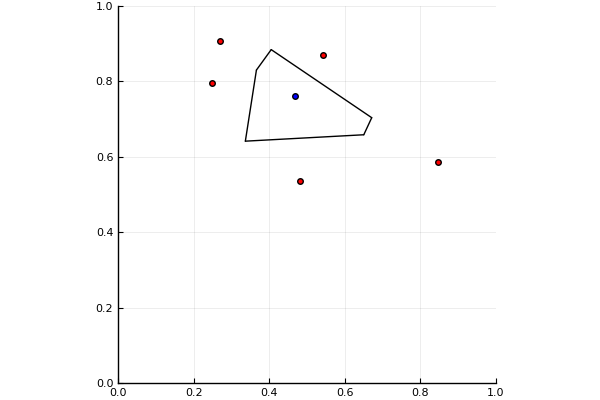

In [84]:
face = voronoi.faces[length(voronoi.faces)÷2]

plot()
halfedge = face.outerComponent
while true
    p0 = halfedge.origin.coordinates
    p1 = halfedge.twin.origin.coordinates
    
    # get neighboring site
    neighbor = halfedge.twin.incidentFace.site
    scatter!(neighbor, color="red")
    
    plot!([p0, p1], color="black")

    halfedge = halfedge.next
    if halfedge === face.outerComponent
        break
    end
end
print("area: ", face.area)
plot!(xlims=(0,1), ylims=(0,1), aspect_ratio=:equal, legend=false)
scatter!(face.site, color="blue")

# Other examples

In [66]:
using CSV

## Squared grid

  0.040043 seconds (56.71 k allocations: 1.527 MiB, 31.64% gc time)
v: 882
e: 1365
f: 485
v - e + f = 2


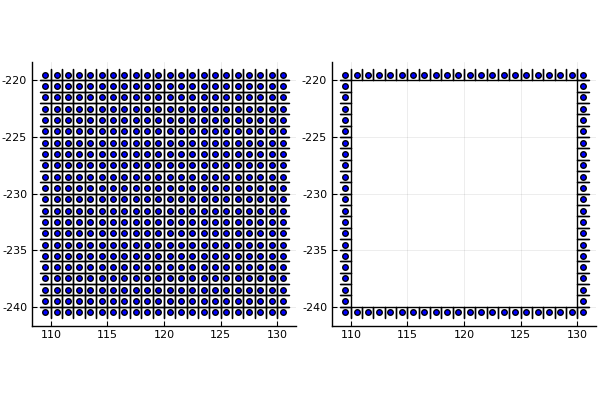

In [67]:
points = CSV.read("cuadricula.csv")
sites = [(points[i,1], points[i,2]) for i in 1:length(points[!,1])]
@time voronoi = getVoronoiDiagram(sites);

v = length(voronoi.vertices)
e = length(voronoi.halfedges) ÷ 2 # halfedge / 2 gives the actual number of edges
f = length(voronoi.faces) + 1 # +1 counts the external face (assuming a connected planar diagram)

plot()
for face in voronoi.faces
    scatter!(face.site, color="blue")
    
    halfedge = face.outerComponent
    while true
        p0 = halfedge.origin.coordinates
        p1 = halfedge.twin.origin.coordinates

        plot!([p0, p1], color="black")

        halfedge = halfedge.next
        if halfedge === face.outerComponent
            break
        end
    end
end
diagram_plt = plot!(aspect_ratio=:equal, legend=false)

plot()
for face in voronoi.faces
    if face.area < Inf; continue; end
    scatter!(face.site, color="blue")
    
    halfedge = face.outerComponent
    while true
        p0 = halfedge.origin.coordinates
        p1 = halfedge.twin.origin.coordinates

        plot!([p0, p1], color="black")

        halfedge = halfedge.next
        if halfedge === face.outerComponent
            break
        end
    end
end
border_plt = plot!(aspect_ratio=:equal, legend=false)

println("v: ", v)
println("e: ", e)
println("f: ", f)
println("v - e + f = ", v - e + f)

plot(diagram_plt, border_plt, layout=2)

## A weird arrangement

  0.019466 seconds (31.27 k allocations: 847.641 KiB)
v: 488
e: 737
f: 251
v - e + f = 2


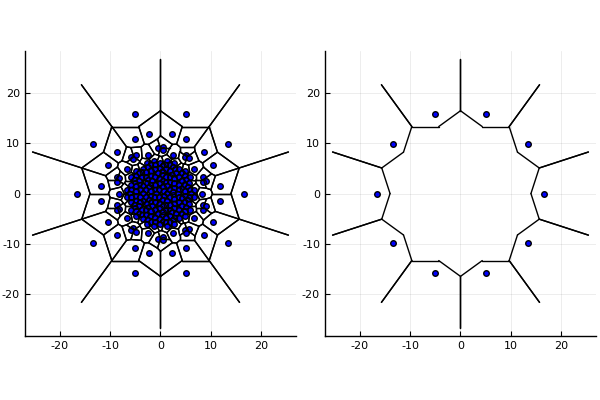

In [68]:
points = CSV.read("centroides.csv")
sites = [(points[i,1], points[i,2]) for i in 1:length(points[!,1])]
@time voronoi = getVoronoiDiagram(sites);

v = length(voronoi.vertices)
e = length(voronoi.halfedges) ÷ 2 # halfedge / 2 gives the actual number of edges
f = length(voronoi.faces) + 1 # +1 counts the external face (assuming a connected planar diagram)

plot()
for face in voronoi.faces
    scatter!(face.site, color="blue")
    
    halfedge = face.outerComponent
    while true
        p0 = halfedge.origin.coordinates
        p1 = halfedge.twin.origin.coordinates

        plot!([p0, p1], color="black")

        halfedge = halfedge.next
        if halfedge === face.outerComponent
            break
        end
    end
end
diagram_plt = plot!(aspect_ratio=:equal, legend=false)

plot()
for face in voronoi.faces
    if face.area < Inf; continue; end
    scatter!(face.site, color="blue")
    
    halfedge = face.outerComponent
    while true
        p0 = halfedge.origin.coordinates
        p1 = halfedge.twin.origin.coordinates

        plot!([p0, p1], color="black")

        halfedge = halfedge.next
        if halfedge === face.outerComponent
            break
        end
    end
end
border_plt = plot!(aspect_ratio=:equal, legend=false)

println("v: ", v)
println("e: ", e)
println("f: ", f)
println("v - e + f = ", v - e + f)

plot(diagram_plt, border_plt, layout=2)